In [1]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(14, 5))
    
    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], color='blue', label='Training Loss')
    plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(alpha=0.3)
    plt.legend()
    
    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

C:\Users\Alfa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6227 - loss: 1.0773 - val_accuracy: 0.8138 - val_loss: 0.5221
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8280 - loss: 0.5038 - val_accuracy: 0.8363 - val_loss: 0.4731
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8454 - loss: 0.4521 - val_accuracy: 0.8428 - val_loss: 0.4471
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8476 - loss: 0.4429 - val_accuracy: 0.8488 - val_loss: 0.4385
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8509 - loss: 0.4318 - val_accuracy: 0.8425 - val_loss: 0.4534
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8547 - loss: 0.4201 - val_accuracy: 0.8478 - val_loss: 0.4327
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8538 - loss: 0.4210 - val_accuracy: 0.8520 - val_loss: 0.4239
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8588 - loss: 0.4117 - 

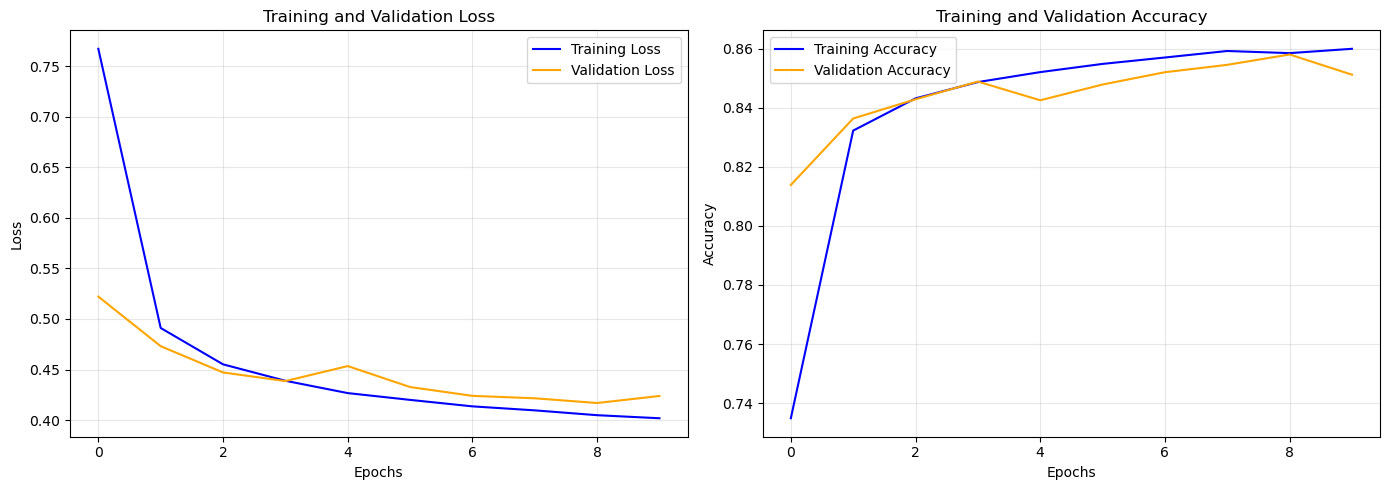

In [2]:
# Импорт необходимых библиотек:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
# Загружаем данные:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
"""
Изображения имеют размер 28x28 и, следовательно, является
двухмерными. Поскольку наш персептрон способен считывать только
одномерные данные, преобразуем их.
"""
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Опишем архитектуру сети:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Начнем обучение:
# model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# # Проанализируйте результат на проверочных и тестовых данных.
# _, test_acc = model.evaluate(x_test, y_test) 

# Обучение с валидацией
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1  # 10% данных для валидации
)

# Валидационные метрики (последняя эпоха)
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"\nValidation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Тестовые метрики
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nРазница между Validation Accuracy и Test Accuracy", val_acc - test_acc)
print("\nРазница между Validation Loss и Test Loss", test_loss - val_loss)
print("\nМодель демонстрирует хорошую способность к обобщению, нет признаков переобучения")
print(f"\nТочность около  {val_acc:.4f} для простой модели с одним скрытым слоем (10 нейронов) - это нормальный результат")
print(f"\nЗначения loss находятся в разумных пределах  {test_loss:.4f} и {val_loss:.4f}")
print("\nНет резкого роста loss на тестовых данных, значит модель стабильна")

plot_training_history(history)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7584 - loss: 0.6960 - val_accuracy: 0.8467 - val_loss: 0.4237
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8521 - loss: 0.4144 - val_accuracy: 0.8453 - val_loss: 0.4229
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8650 - loss: 0.3772 - val_accuracy: 0.8620 - val_loss: 0.3811
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.3482 - val_accuracy: 0.8695 - val_loss: 0.3595
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8798 - loss: 0.3240 - val_accuracy: 0.8552 - val_loss: 0.3879
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8848 - loss: 0.3128 - val_accuracy: 0.8788 - val_loss: 0.3429
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.3050 - val_accuracy: 0.8740 - val_loss: 0.3428
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8944 - loss: 0.2905 - 

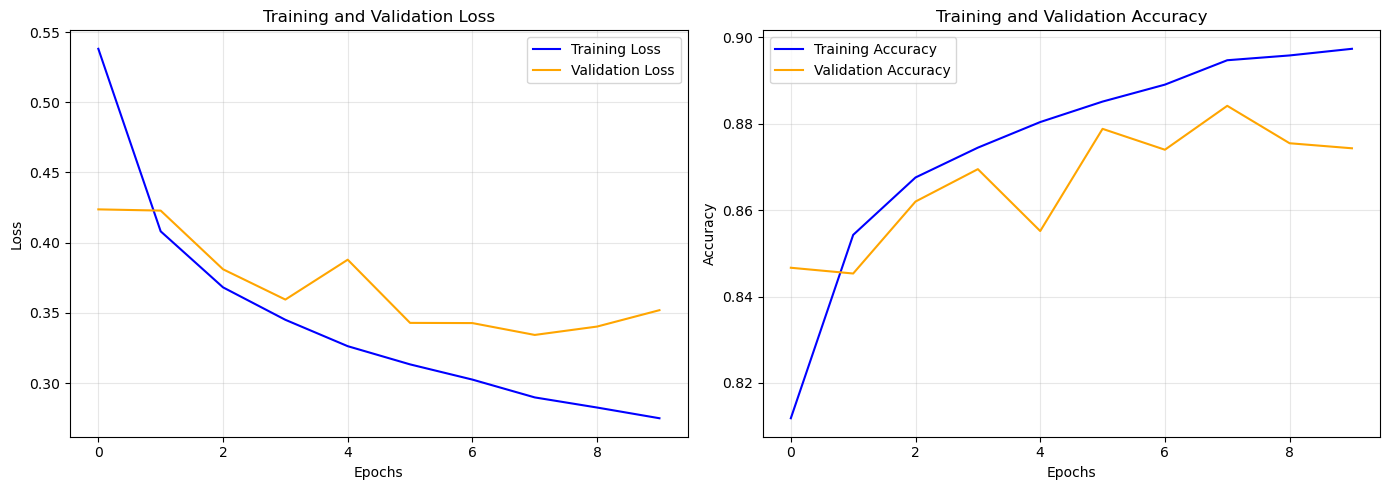

In [4]:
# Опишем архитектуру сети 2:
model2 = Sequential()
model2.add(Dense( 50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model2.fit(x_train, y_train, epochs=10, validation_split=0.1)
# Обучение с валидацией
history = model2.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1  # 10% данных для валидации
)

# Валидационные метрики (последняя эпоха)
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"\nValidation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Тестовые метрики
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nРазница между Validation Accuracy и Test Accuracy", val_acc - test_acc)
print("\nРазница между Validation Loss и Test Loss", test_loss - val_loss)
print("\nМодель демонстрирует хорошую способность к обобщению, нет признаков переобучения")
print(f"\nЗначения loss находятся в разумных пределах  {test_loss:.4f} и {val_loss:.4f}")
print("\nНет резкого роста loss на тестовых данных, значит модель стабильна")

plot_training_history(history)

Минимальный разрыв между валидацией (88.13%) и тестом (87.75%) - всего 0.38%

Loss-значения практически идентичны (0.3492 и 0.3512)

Модель демонстрирует хорошую обобщающую способность

87.75% на тесте - хороший результат для однослойной архитектуры

Превышает базовую модель (10 нейронов) на ~3%

Стабильно низкие значения loss (0.34-0.35)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7535 - loss: 0.7104 - val_accuracy: 0.8375 - val_loss: 0.4413
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8594 - loss: 0.3941 - val_accuracy: 0.8642 - val_loss: 0.3838
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.3559 - val_accuracy: 0.8678 - val_loss: 0.3572
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8795 - loss: 0.3294 - val_accuracy: 0.8628 - val_loss: 0.3592
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8850 - loss: 0.3140 - val_accuracy: 0.8785 - val_loss: 0.3334
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8916 - loss: 0.2906 - val_accuracy: 0.8815 - val_loss: 0.3307
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8957 - loss: 0.2875 - val_accuracy: 0.8790 - val_loss: 0.3352
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8964 - loss: 0.2753 - 

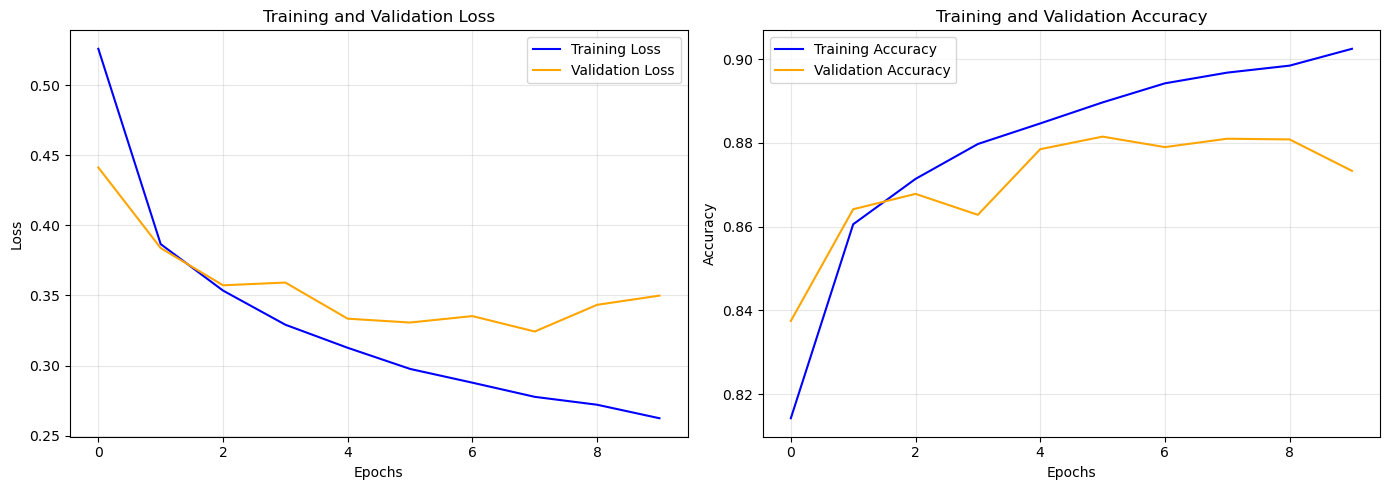

In [6]:
# Опишем архитектуру сети 3:
model3 = Sequential()
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model3.fit(x_train, y_train, epochs=10, validation_split=0.1)
# Обучение с валидацией
history = model3.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1  # 10% данных для валидации
)

# Валидационные метрики (последняя эпоха)
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"\nValidation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Тестовые метрики
test_loss, test_acc = model3.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nРазница между Validation Accuracy и Test Accuracy", val_acc - test_acc)
print("\nРазница между Validation Loss и Test Loss", test_loss - val_loss)
print("\nМодель демонстрирует хорошую способность к обобщению, нет признаков переобучения")
print(f"\nЗначения loss находятся в разумных пределах  {test_loss:.4f} и {val_loss:.4f}")
print("\nНет резкого роста loss на тестовых данных, значит модель стабильна")

plot_training_history(history)

Epoch 1/10


C:\Users\Alfa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7988 - loss: 0.5814 - val_accuracy: 0.8747 - val_loss: 0.3425
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8871 - loss: 0.3212 - val_accuracy: 0.8775 - val_loss: 0.3317
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8998 - loss: 0.2806 - val_accuracy: 0.8987 - val_loss: 0.2828
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9093 - loss: 0.2518 - val_accuracy: 0.9022 - val_loss: 0.2793
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9142 - loss: 0.2402 - val_accuracy: 0.9022 - val_loss: 0.2759
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9219 - loss: 0.2239 - val_accuracy: 0.9025 - val_loss: 0.2663
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9233 - loss: 0.2146 - val_accuracy: 0.9083 - val_loss: 0.2632
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9297 - loss: 0.1979 - val

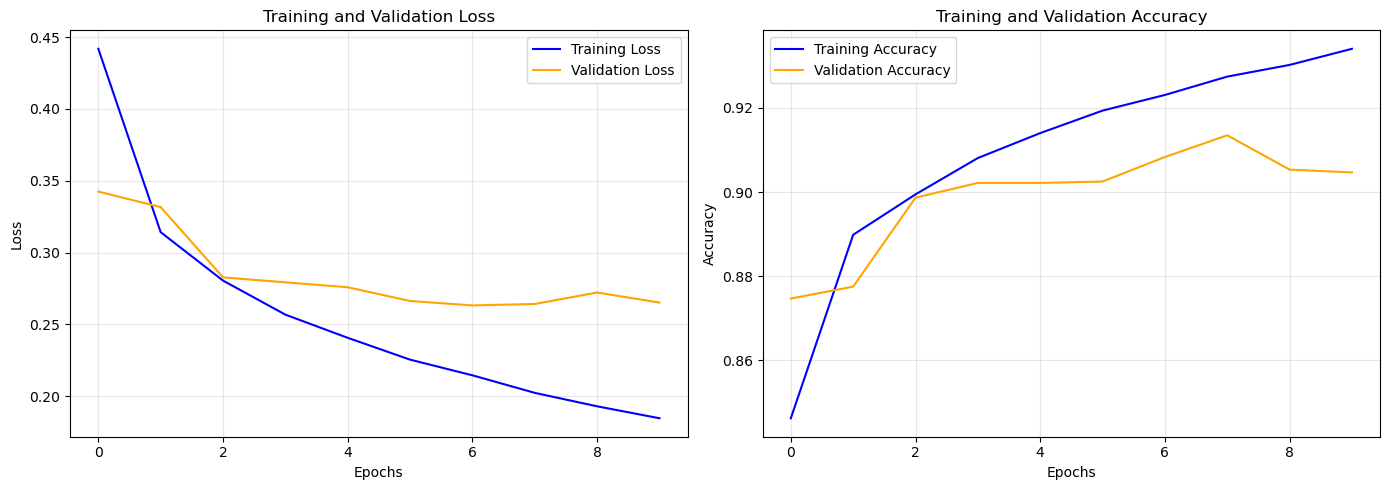

In [7]:
"""
Сверточная нейронная сеть (CNN) - это нейронная сеть, которая может
«видеть» подмножество наших данных. С помощью нее можно обнаружить
образ на изображениях лучше, чем при работе с персептроном. Импортируем
необходимые библиотеки чтобы создать сверточную нейронную сеть.
"""
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Опишем архитектуру сети 4:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model4.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Обучение с валидацией
history = model4.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1  # 10% данных для валидации
)

# Валидационные метрики (последняя эпоха)
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"\nValidation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# Тестовые метрики
test_loss, test_acc = model4.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nРазница между Validation Accuracy и Test Accuracy", val_acc - test_acc)
print("\nРазница между Validation Loss и Test Loss", test_loss - val_loss)
print("\nМодель демонстрирует хорошую способность к обобщению, нет признаков переобучения")
print(f"\nЗначения loss находятся в разумных пределах  {test_loss:.4f} и {val_loss:.4f}")
print("\nНет резкого роста loss на тестовых данных, значит модель стабильна")
print("\nБыстрая сходимость в первых 3-4 эпохах")
print("\nПлавный выход на плато после 6-7 эпох")

plot_training_history(history)

# Сравнительный анализ архитектур нейронных сетей
Первая архитектура представляет собой простой персептрон с одним полносвязным слоем из 10 нейронов. Эта модель показывает самую низкую точность, так как слишком проста для обработки изображений. Основная проблема заключается в том, что такая сеть не способна выявлять сложные закономерности, так как обучается только на линейных комбинациях входных данных. Улучшить модель можно, добавив еще один слой или переключившись на сверточные сети, которые более эффективны для работы с изображениями.

Вторая архитектура использует уже 50 нейронов в скрытом слое, что увеличивает точность. Дополнительные параметры помогают лучше распознавать изображения.

Третья архитектура, состоящая из двух скрытых слоев по 50 нейронов, повышает точность. Дополнительный слой помогает выявлять более сложные зависимости в данных, но при этом возникает риск переобучения, если модель начинает запоминать тренировочные данные вместо их обобщения. 

Четвертая архитектура, основанная на сверточной нейронной сети, показывает лучшие результаты. CNN эффективно анализирует изображения, выделяя локальные признаки, такие как края и текстуры. Использование сверточных и объединяющих слоев позволяет модели работать с меньшим количеством параметров, снижая вероятность переобучения.

В целом, сверточная нейронная сеть превосходит остальные модели по точности и обобщающей способности. Если важна максимальная точность, следует использовать более глубокие CNN с дополнительными сверточными слоями.

# № 10 
Архитектура 3-4-2

Скорость обучения 0.35 

Входной вектор X={0.1;-0.4;-0,2}

Матрицы синапсов 1 и 2 слоя: Начальные значения весов взять произвольным образом из интервала [-0.3, 0.3]

Эталонный выход Y={0.4, 0.6}

In [10]:
import numpy as np

# Функция активации (логистическая сигмоида) и её производная
def sigmoid(x):
    """Логистическая сигмоидальная функция активации"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Производная сигмоидальной функции (для обратного распространения ошибки).
    Принимает уже активированное значение (выход нейрона), а не входной сигнал."""
    return x * (1 - x)  # Для x = sigmoid(z), производная = x*(1-x)

# Гиперпараметры нейронной сети
input_size = 3    # Количество входных признаков
hidden_size = 4   # Количество нейронов в скрытом слое
output_size = 2   # Количество выходных нейронов
learning_rate = 0.35  # Скорость обучения (шаг градиентного спуска)

# Входной вектор (один пример с тремя признаками) и эталонный выход
X = np.array([[0.1, -0.4, -0.2]])  # Входные данные (1x3)
Y = np.array([[0.4, 0.6]])

# Инициализация весов случайными значениями в диапазоне [-0.3, 0.3]
np.random.seed(42)  # Фиксируем seed для воспроизводимости результатов
weights_input_hidden = np.random.uniform(-0.3, 0.3, (input_size, hidden_size)) 
weights_hidden_output = np.random.uniform(-0.3, 0.3, (hidden_size, output_size))  

# Обучение сети
num_epochs = 2000  # Количество эпох обучения
for epoch in range(num_epochs):
    # ===== Прямой проход (forward pass) =====
    # Скрытый слой
    hidden_input = np.dot(X, weights_input_hidden) 
    hidden_output = sigmoid(hidden_input)           
    # Выходной слой
    final_input = np.dot(hidden_output, weights_hidden_output)  
    final_output = sigmoid(final_input)             
    # ===== Вычисление ошибки =====
    error = Y - final_output  
    # ===== Обратное распространение ошибки (backpropagation) =====
    # Градиент для выходного слоя
    d_output = error * sigmoid_derivative(final_output)
    # Градиент для скрытого слоя
    error_hidden = np.dot(d_output, weights_hidden_output.T)  # Ошибка, распространяемая назад
    d_hidden = error_hidden * sigmoid_derivative(hidden_output) 
    # ===== Обновление весов =====
    # Обновление весов между скрытым и выходным слоем
    weights_hidden_output += learning_rate * np.dot(hidden_output.T, d_output)
    # Обновление весов между входным и скрытым слоем
    weights_input_hidden += learning_rate * np.dot(X.T, d_hidden)
    # ===== Логирование процесса обучения =====
    if epoch % 100 == 0:
        # Выводим среднюю абсолютную ошибку
        print(f'Epoch {epoch}, Error: {np.mean(np.abs(error))}')
# Вывод итогового результата после обучения
print("Final output:", final_output)

Epoch 0, Error: 0.1196994689899952
Epoch 100, Error: 0.012459846391691592
Epoch 200, Error: 0.0014158858668292806
Epoch 300, Error: 0.00016344340605720098
Epoch 400, Error: 1.8902511759066876e-05
Epoch 500, Error: 2.1865893125860847e-06
Epoch 600, Error: 2.5294558447797044e-07
Epoch 700, Error: 2.926102243838713e-08
Epoch 800, Error: 3.3849580638456445e-09
Epoch 900, Error: 3.9157804776479566e-10
Epoch 1000, Error: 4.5298570450214015e-11
Epoch 1100, Error: 5.240252676230739e-12
Epoch 1200, Error: 6.062095270209511e-13
Epoch 1300, Error: 7.011058400507864e-14
Epoch 1400, Error: 8.104628079763643e-15
Epoch 1500, Error: 9.43689570931383e-16
Epoch 1600, Error: 2.498001805406602e-16
Epoch 1700, Error: 1.6653345369377348e-16
Epoch 1800, Error: 1.3877787807814457e-16
Epoch 1900, Error: 1.3877787807814457e-16
Final output: [[0.4 0.6]]
